In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
amz_data = pd.read_csv('amazon_vfl_reviews.csv')
amz_data.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [3]:
amz_data.name.unique()

array(['Mamaearth-Onion-Growth-Control-Redensyl',
       'Mamaearth-Percent-Natural-Berry-Toothpaste',
       'Mamaearth-Natural-Turmeric-Saffron-brightning',
       'Mamaearth-Illuminate-Vitamin-Radiant-Turmeric',
       'Mamaearth-Blemishes-Pigmentation-Blemish-Mulberry',
       'Mamaearth-Face-Wash-100-ml',
       'Mamaearth-Moisturizing-Baby-Bathing-Oatmeal',
       'Godrej-Protekt-Master-Blaster-Handwash',
       'Godrej-No-1-Bathing-Soap-Lime',
       'Godrej-No-1-Bathing-Soap-Turmeric',
       'Godrej-Direct-Cool-Refrigerator-1905-PTDI',
       'Godrej-aer-Pocket-Bathroom-Fragrance',
       'Godrej-Security-Solutions-SEEC9060-Electronic',
       'Godrej-Matic-Spray-Violet-Valley',
       'Godrej-Security-Solutions-Goldilocks-Personal',
       'Godrej-ViroShield-Disinfecting-VIROSHIELD-30UV',
       'Titan-Analog-Black-Dial-Watch-1805NM01',
       'Titan-Analog-White-Dial-Watch-NK1639SL03',
       'Titan-Karishma-Analog-Blue-Watch-1774SM01',
       'Titan-Karishma-Analog-Black-Wa

In [4]:
def comp(x):
    return x.split('-')[0]
amz_data['company'] = amz_data.name.apply(comp)
amz_data.head()

,asin,name,date,rating,review,company
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,Mamaearth
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,Mamaearth
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,Mamaearth
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,Mamaearth


In [5]:
amz_data.shape

(2782, 6)

In [6]:
amz_data.isnull().sum()

asin       0
name       0
date       0
rating     0
review     4
company    0
dtype: int64

In [7]:
amz_data=amz_data.dropna(how='any')
amz_data.shape

(2778, 6)

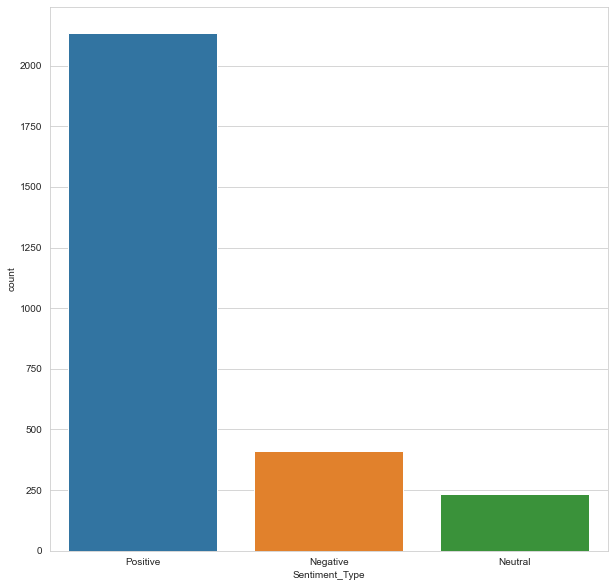

In [8]:
import matplotlib.pyplot as plt
bloblist_desc = list()

df_amz_review = amz_data['review'].astype(str)
for row in df_amz_review:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_amz_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_amz_polarity_desc):
    if df_amz_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_amz_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_amz_polarity_desc['Sentiment_Type'] = df_amz_polarity_desc.apply(f, axis=1)

plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_amz_polarity_desc)

In [9]:
amz_data.company.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

In [10]:
amz_data['company'] = amz_data['company'].str.replace('PATANJALI', 'Patanjali')
amz_data['company'] = amz_data['company'].str.replace('MYSORE', 'Mysore')
amz_data.company.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'Dettol', 'Savlon', 'Cinthol', 'Britannia', 'NutriChoice',
       'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack', 'Reflex',
       'Mysore'], dtype=object)

In [11]:
amz_mamaearth = amz_data[amz_data.company == 'Mamaearth']
amz_godrej = amz_data[amz_data.company == 'Godrej']
amz_titan = amz_data[amz_data.company == 'Titan']
amz_maaza = amz_data[amz_data.company == 'Maaza']
amz_paper_boat = amz_data[amz_data.company == 'Paper']
amz_indiana = amz_data[amz_data.company == 'Indiana']
amz_coca_cola = amz_data[amz_data.company == 'Coca']
amz_natural = amz_data[amz_data.company == 'Natural']
amz_maggi = amz_data[amz_data.company == 'Maggi']
amz_glucon_d = amz_data[amz_data.company == 'Glucon']
amz_amul = amz_data[amz_data.company == 'Amul']
amz_patanjali = amz_data[amz_data.company == 'Patanjali']
amz_dettol = amz_data[amz_data.company == 'Dettol']
amz_savlon = amz_data[amz_data.company == 'Savlon']
amz_cinthol = amz_data[amz_data.company == 'Cinthol']
amz_britannia = amz_data[amz_data.company == 'Britannia']
amz_nutrichoice = amz_data[amz_data.company == 'NutriChoice']
amz_streax = amz_data[amz_data.company == 'Streax']
amz_himalaya = amz_data[amz_data.company == 'Himalaya']
amz_society = amz_data[amz_data.company == 'Society']
amz_tata = amz_data[amz_data.company == 'Tata']
amz_fastrack = amz_data[amz_data.company == 'Fastrack']
amz_reflex = amz_data[amz_data.company == 'Reflex']
amz_mysore = amz_data[amz_data.company == 'Mysore']